# Importing the Libraries

In [628]:
import pandas as pd 
import numpy as  np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

# Data Dictionary



| Column Name    | Description                                                                                      |
|----------------|--------------------------------------------------------------------------------------------------|
| *country*    | Name of the country                                                                             |
| *child_mort* | Death of children under 5 years of age per 1000 live births                                     |
| *exports*    | Exports of goods and services per capita. Given as %age of the GDP per capita                   |
| *health*     | Total health spending per capita. Given as %age of GDP per capita                               |
| *imports*    | Imports of goods and services per capita. Given as %age of the GDP per capita                   |
| *Income*     | Net income per person                                                                           |
| *Inflation*  | The measurement of the annual growth rate of the Total GDP                                      |
| *life_expec* | The average number of years a newborn child would live if the current mortality patterns remain |
| *total_fer*  | The number of children that would be born to each woman if current age-fertility rates remain   |
| *gdpp*       | The GDP per capita. Calculated as the Total GDP divided by the total population.                |

Read the dataset

In [629]:
data=pd.read_csv(r"/Users/vivekrajashekaran/Downloads/Country-data (1).csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


country is the unique identifier lets set it into index

In [630]:
data.set_index("country",inplace=True)

info of the data

In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


Five point summary of the dataset

In [632]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Inference of five point summary

1)All the economic factors like exports,imports,income,inflation and GDP are right skewed.shows huge variations in economic conditionsof the country

2)Health factors like child mortality,health  and total_fertility rate 

#lets explore the kind of relation these factors have among themselves 

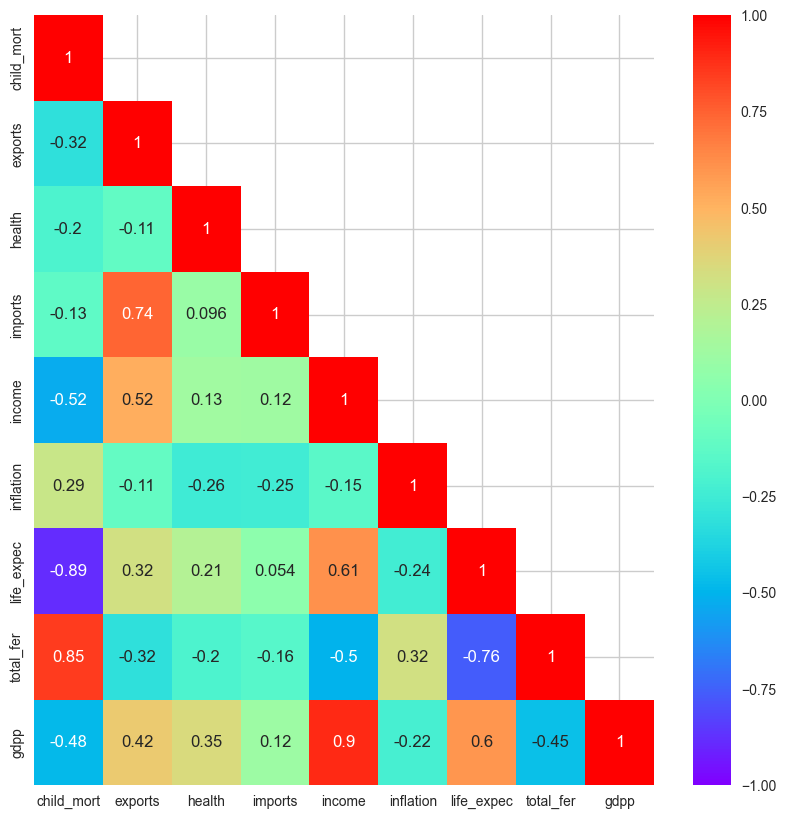

In [633]:
plt.rcParams['figure.figsize'] = [10,10] 
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="rainbow",mask=np.triu(data.corr(),k=1))
plt.show()

Inference from the heatmap

1)Higher GDP lead to higher net income per person

2)countries with higher fertility have higher child mortality rate.This could mean poor healthcare structure in a countrty

3)countries with better life expectancy have less total fertility which indicates better healthcare

4)countries with better income have better life expectancy

5)countries with better exports have better income and better imports too

# Univariate Analysis

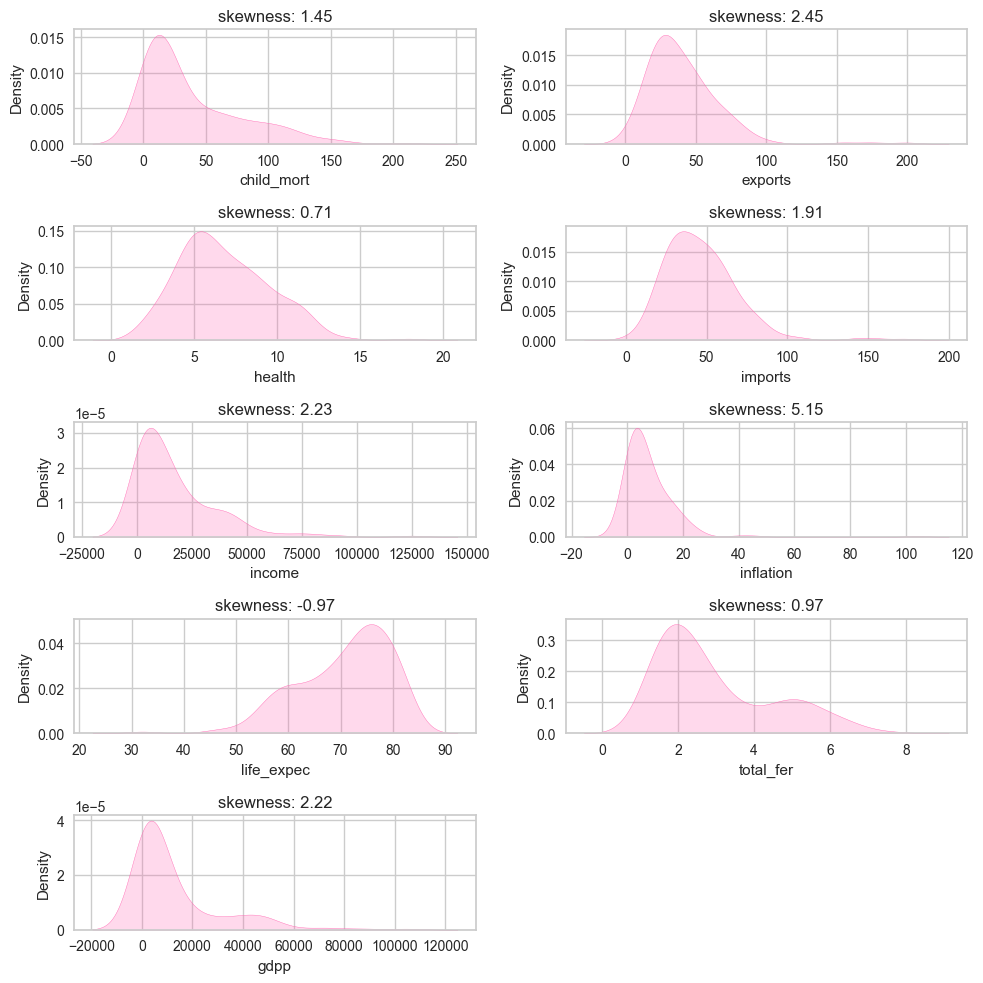

In [634]:
k=1
for i in data.columns:
    plt.subplot(5,2,k)
    sns.kdeplot(data=data,x=i,fill=True,color="hotpink")
    plt.title(f"skewness: {round(data[i].skew(), 2)}")
    
    k+=1
plt.tight_layout()
plt.show()

Inference of univariate Analysis

1)Most of the columns are right skewed

2)Health is moderately right skewed,while life expectancy 


# Multivariate Analysis

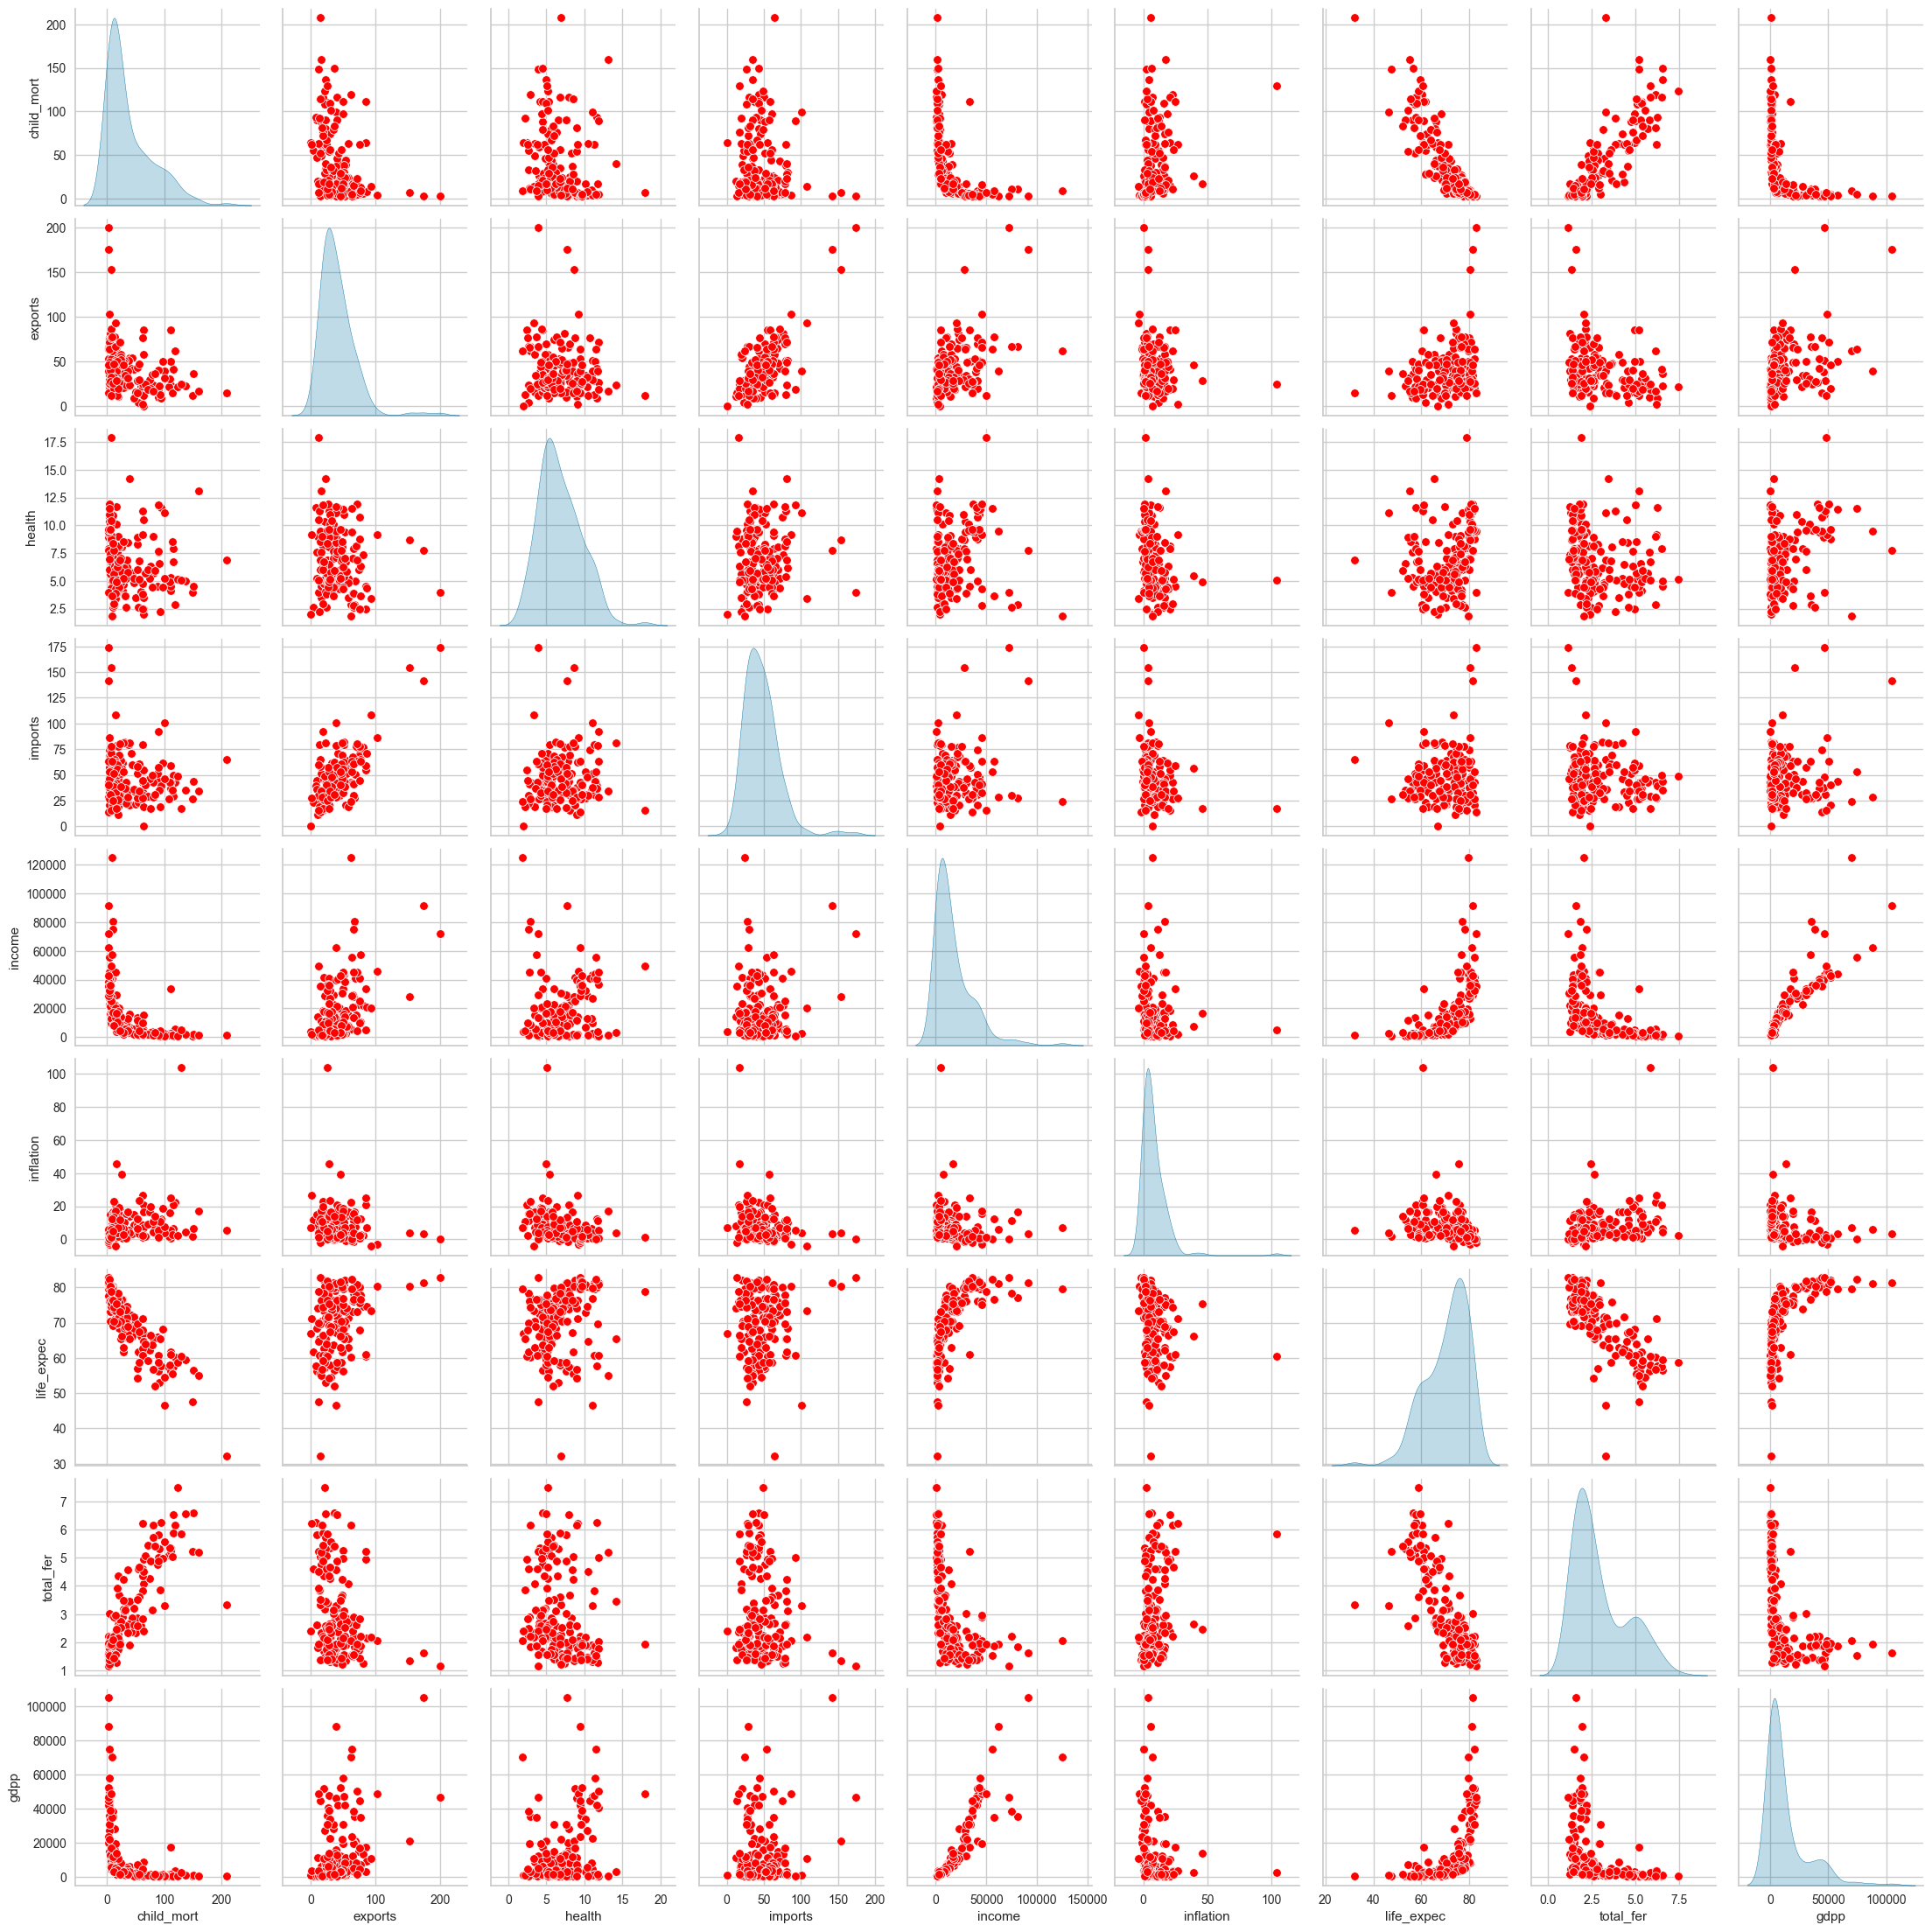

In [635]:
sns.pairplot(data=data,diag_kind="kde",plot_kws={"color":"red"})
plt.show()

# Data pre-processing

1)checking null values

In [636]:
data.isnull().sum()
#**Inference**
# There is null values in the dataset

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

2)checking outliers

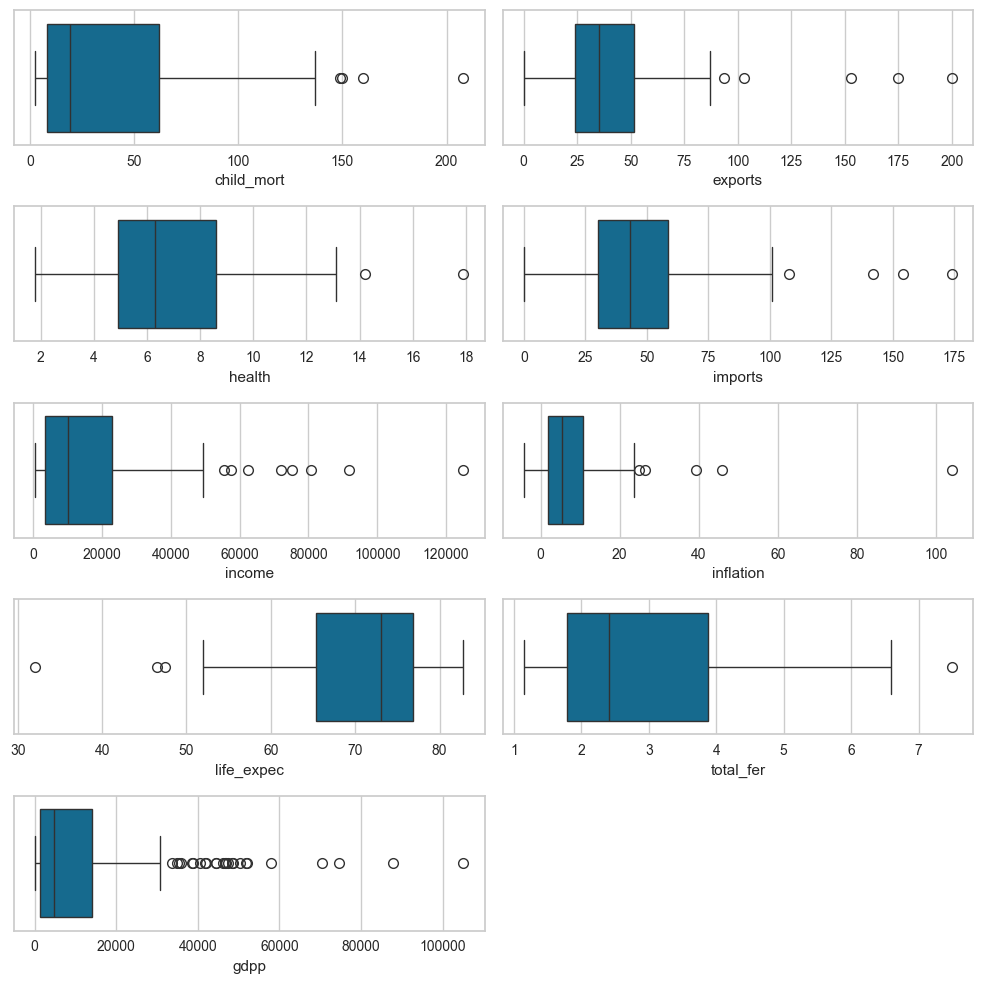

In [637]:
k=1
for i in data.columns:
    plt.subplot(5,2,k)
    sns.boxplot(data=data,x=i)
  
    k+=1
plt.tight_layout()
plt.show()

Capping the extreme outliers by taking whisker length as 2.5 IQR

In [638]:
for i in data.columns:
    Q1,Q3=np.quantile(data[i],[0.25,0.75])
    IQR=Q3-Q1
    UL,LL=Q3+2.5*IQR,Q1-2.5*IQR
    data[i]=data[i].apply(lambda x: UL if x>UL else LL if x<LL else x)

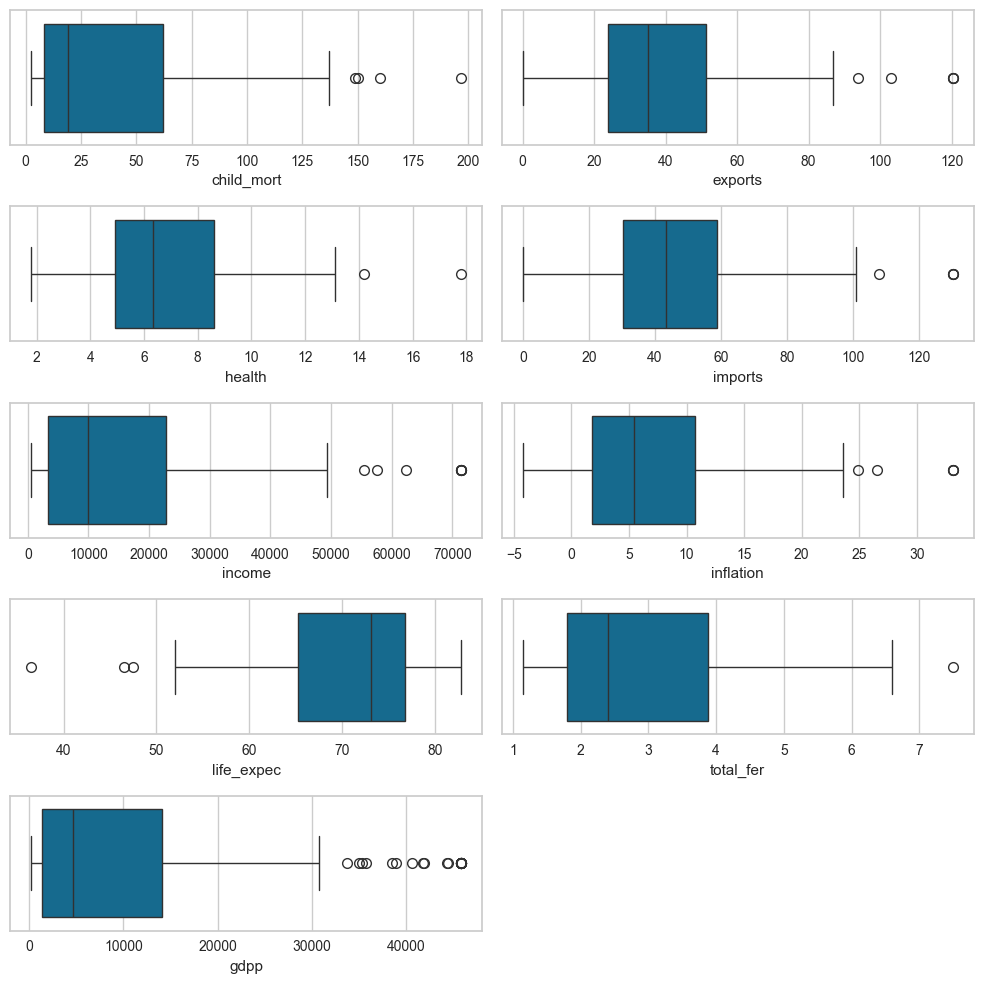

In [639]:
#After removing the outliers
k=1
for i in data.columns:
    plt.subplot(5,2,k)
    sns.boxplot(data=data,x=i)
  
    k+=1
plt.tight_layout()
plt.show()
    

# Standardize the data

In [640]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data_s=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)
data_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.302168,-1.314143,0.279553,-0.068565,-0.878427,0.303790,-1.642400,1.902882,-0.767399
Albania,-0.540991,-0.528460,-0.096883,0.099062,-0.391534,-0.381016,0.652932,-0.859973,-0.526335
Algeria,-0.273031,-0.074510,-0.966706,-0.680176,-0.217727,1.225166,0.675771,-0.038404,-0.501118
Angola,2.023403,0.968702,-1.449130,-0.159174,-0.627373,2.096738,-1.197037,2.128151,-0.564502
Antigua and Barbuda,-0.698761,0.235398,-0.286928,0.565699,0.145102,-0.802968,0.710030,-0.541946,0.026399
Argentina,-0.593581,-0.925667,0.469599,-1.377866,0.121693,1.889221,0.595834,-0.382933,-0.103095
Armenia,-0.503426,-0.842733,-0.882648,-0.050443,-0.580556,0.072754,0.310345,-0.833471,-0.585630
Australia,-0.836497,-0.886382,0.699846,-1.155874,1.450115,-0.841704,1.303847,-0.674457,2.319805
Austria,-0.849018,0.488562,1.529468,0.062818,1.555453,-0.881409,1.132554,-0.999109,2.319805


# Appling PCA for dimensionality  reduction

In [641]:
from sklearn.decomposition import PCA

pca=PCA(n_components=9)
pca.fit(data_s)


PCA(n_components=9)

In [642]:
##eigen values
pca.explained_variance_

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658,
       0.21134307, 0.143956  , 0.0850118 , 0.04429827])

In [643]:
pca.explained_variance_ratio_.cumsum()


array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697,
       0.96981892, 0.98571825, 0.99510744, 1.        ])

Inference from PCA

we will go with top 5 PC's explaining~95% of variance

In [644]:
#fitting and transforming final pca model
pca_final=PCA(n_components=5)
pca_data=pca_final.fit_transform(data_s)

#creating dataframe
pca_data=pd.DataFrame(pca_data,columns=["PC1","PC2","PC3","PC4","PC5"],index=data.index)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311


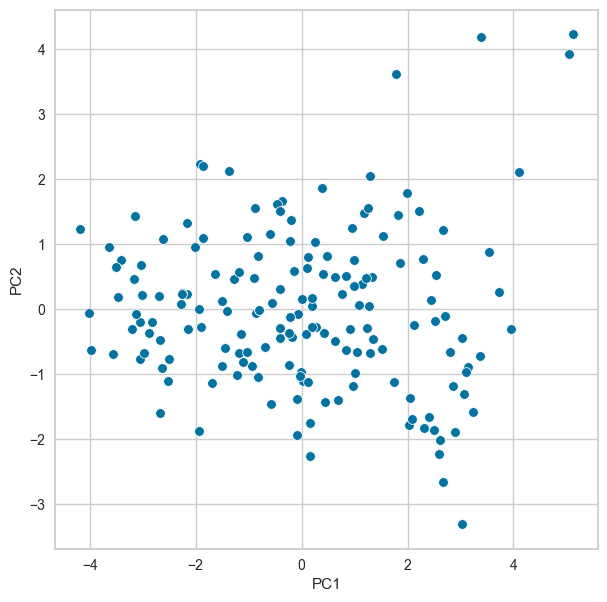

In [645]:
#lets visualize PC1 and PC2
plt.figure(figsize=(7,7))
sns.scatterplot(data=pca_data,x="PC1",y="PC2")
plt.show()

# Clustering

In [646]:
#imports for clustering
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
#imports for kmeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
#imports for aagglomerative
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

# Model 1: Kmeans clustering

Deciding the k value

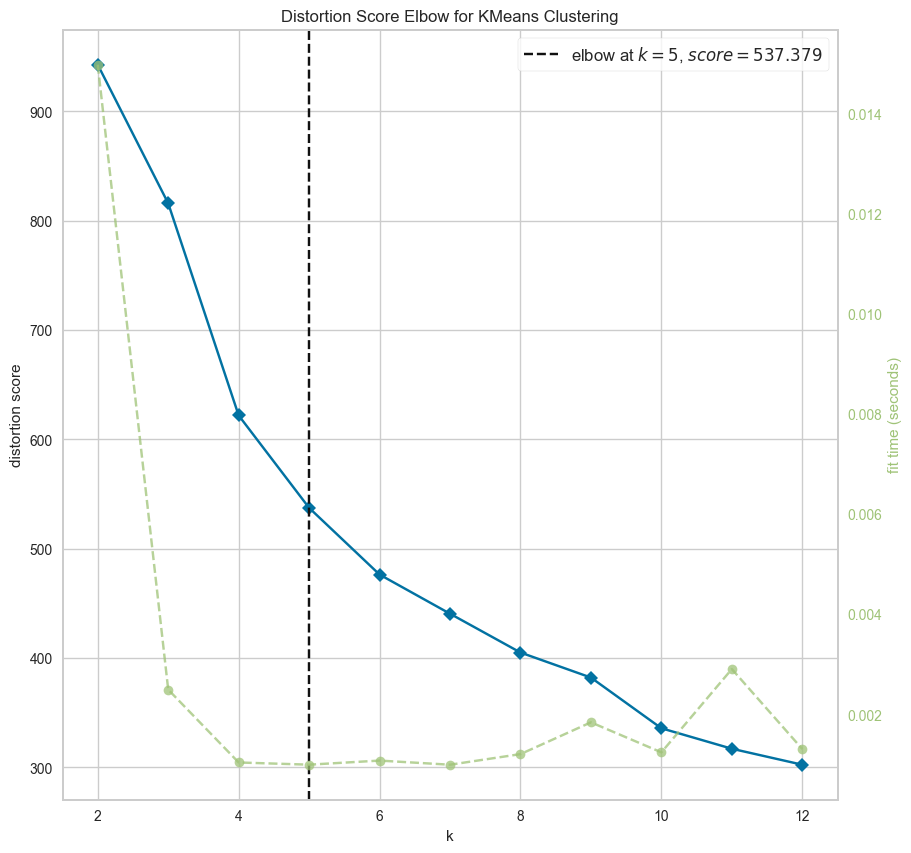

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [647]:
kelbow=KElbowVisualizer(estimator=KMeans(random_state=0),k=12)
kelbow.fit(pca_data)
kelbow.show()

It is difficult to locate the elbow in the above plot,therefore we will look at silhoutte visualizer to deceide the value of k

Silhoutte visualizer

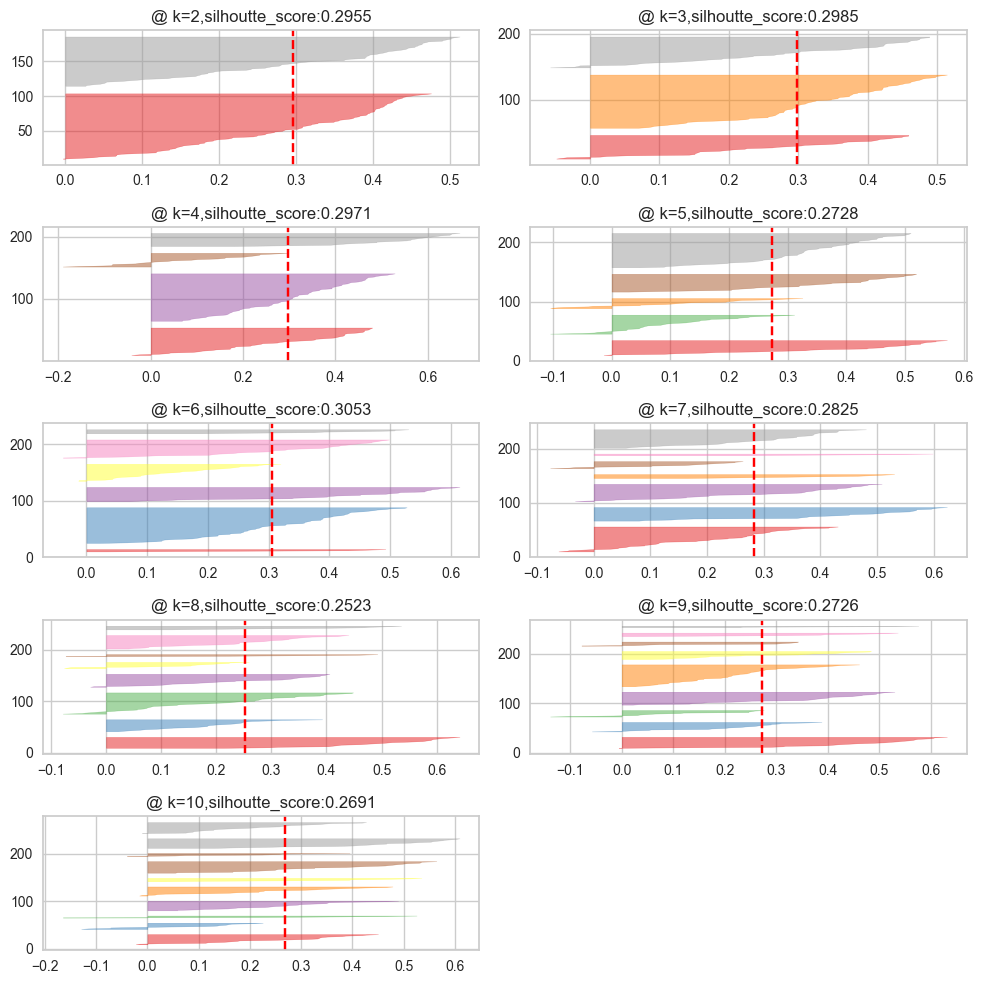

In [648]:
plt.figure(figsize=(10,10))
k=1
for i in range(2,11):
    plt.subplot(5,2,k)
    model=KMeans(n_clusters=i,random_state=0, n_init=10)
    sil_vis=SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f"@ k={i},silhoutte_score:{round(sil_vis.silhouette_score_, 4)}")
    k+=1
plt.tight_layout()
plt.show()

Inference

Although we are getting maximum score at k=3 but it forms clusters with very less density and therefore we go with k=2 

go with k=3



In [649]:
#model building
kmean_final=KMeans(n_clusters=3,random_state=0,n_init=10)
kmean_pred=kmean_final.fit_predict(pca_data)


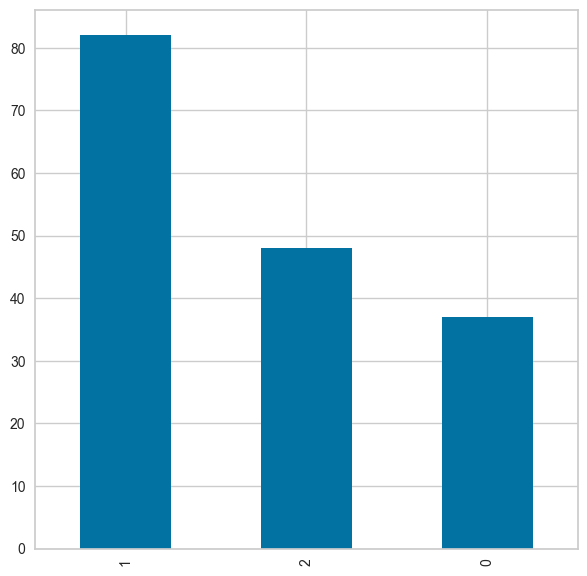

In [650]:
#visualizing
plt.figure(figsize=(7,7))
pd.Series(kmean_pred).value_counts().plot(kind="bar")
plt.show()

Business Interpretation

In [651]:
data["Labels"]=kmean_pred
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [652]:
data.groupby(by="Labels").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
1,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


In [653]:
lab_map={0:"Developed",2:"Under_developed",1:"Developing"}

In [654]:
data["Status"]=data["Labels"].map(lab_map)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels,Status
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,Under_developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,Under_developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,Developing


In [655]:
#Developed countries

pd.DataFrame(data[data["Status"]=="Developed"].index)

,country
0,Australia
1,Austria
2,Bahamas
3,Bahrain
4,Belgium
5,Brunei
6,Canada
7,Cyprus
8,Czech Republic
9,Denmark


In [656]:
#Developing countries
pd.set_option('display.max_rows',None)
pd.DataFrame(data[data["Status"]=="Developing"].index)

,country
0,Albania
1,Algeria
2,Antigua and Barbuda
3,Argentina
4,Armenia
5,Azerbaijan
6,Bangladesh
7,Barbados
8,Belarus
9,Belize


In [657]:
pd.DataFrame(data[data["Status"]=="Under_developed"].index)

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


lets explore these categories of countries

In [658]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels,Status
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,Under_developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,Under_developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,Developing


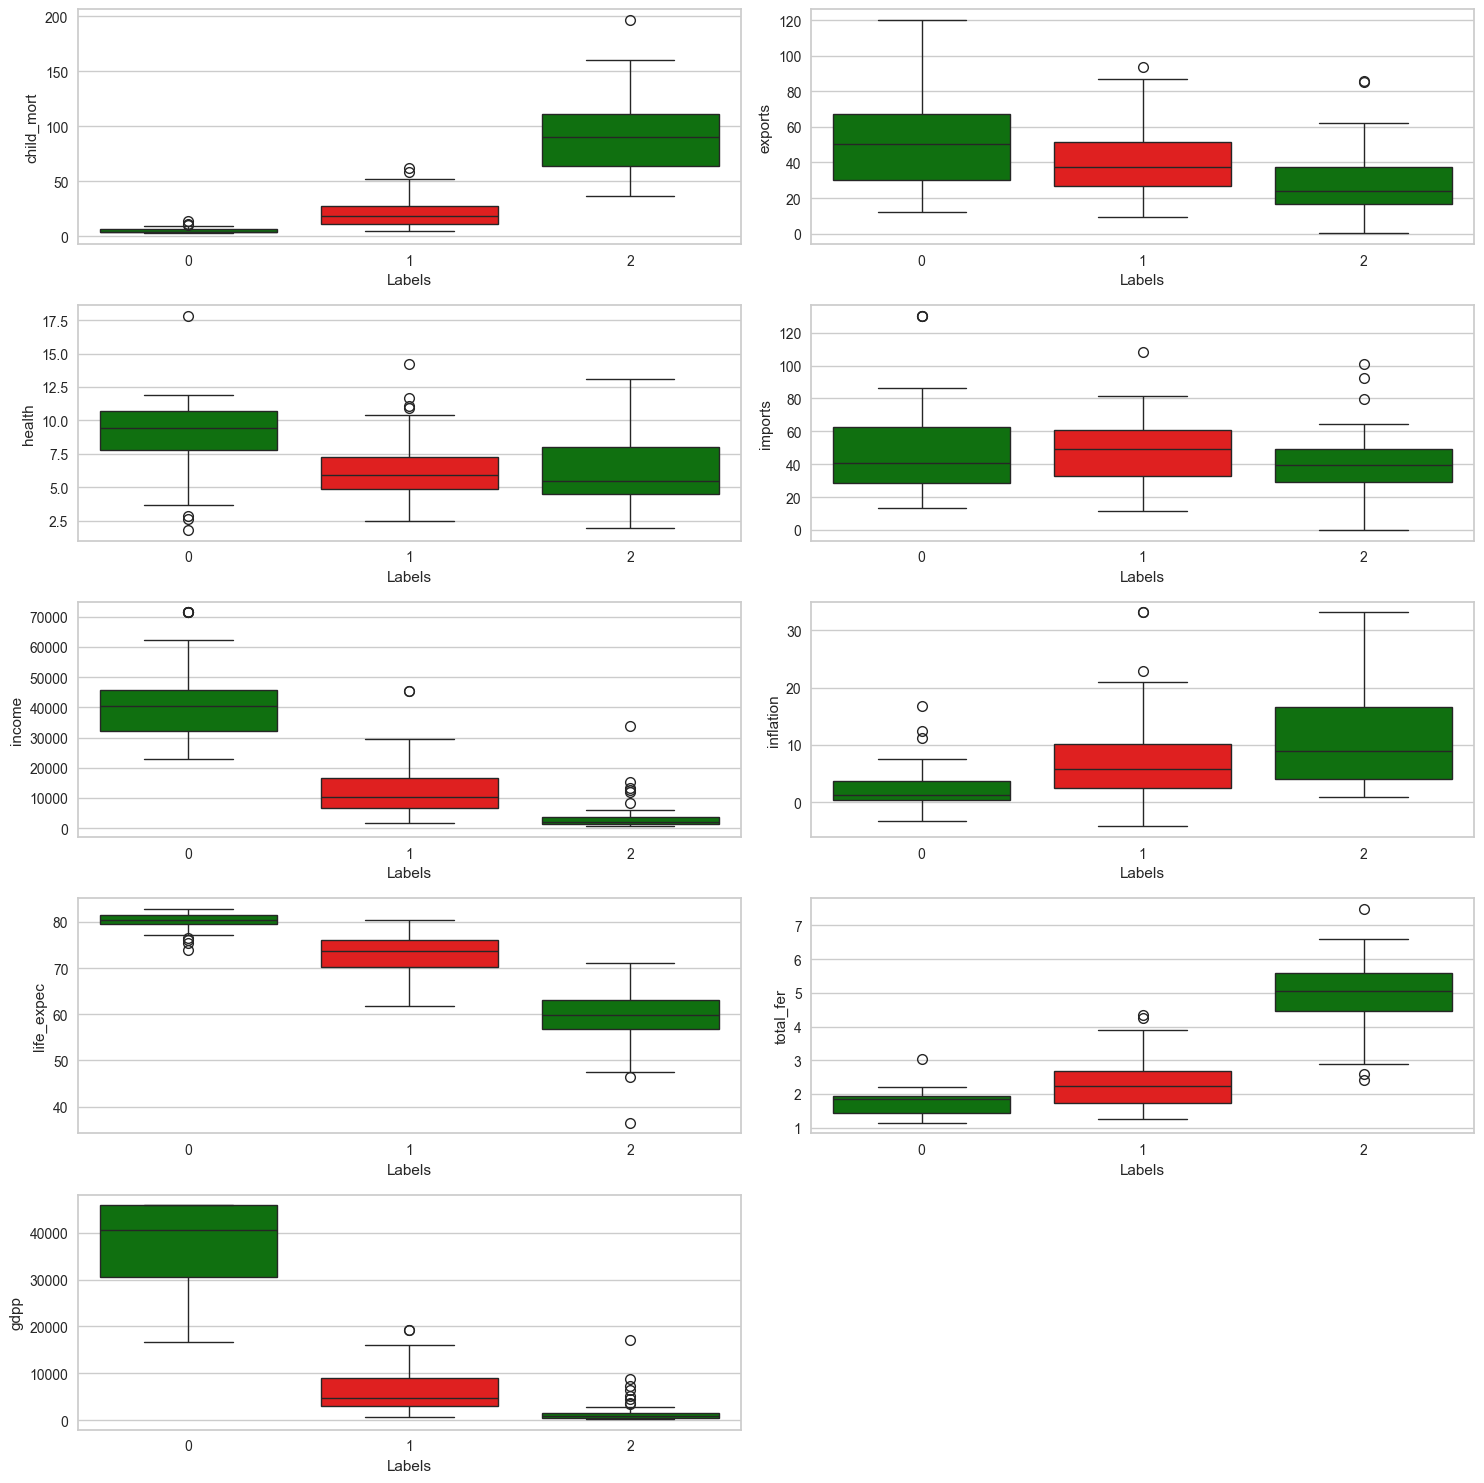

In [659]:
plt.rcParams['figure.figsize'] = [15, 15]
k=1
for i in data.columns:
   if i not in ["Labels", "Status"]:
        plt.subplot(5,2,k)
        sns.boxplot(data=data,x="Labels",y=i,palette=["green","red"])
        k+=1
plt.tight_layout()
plt.show()

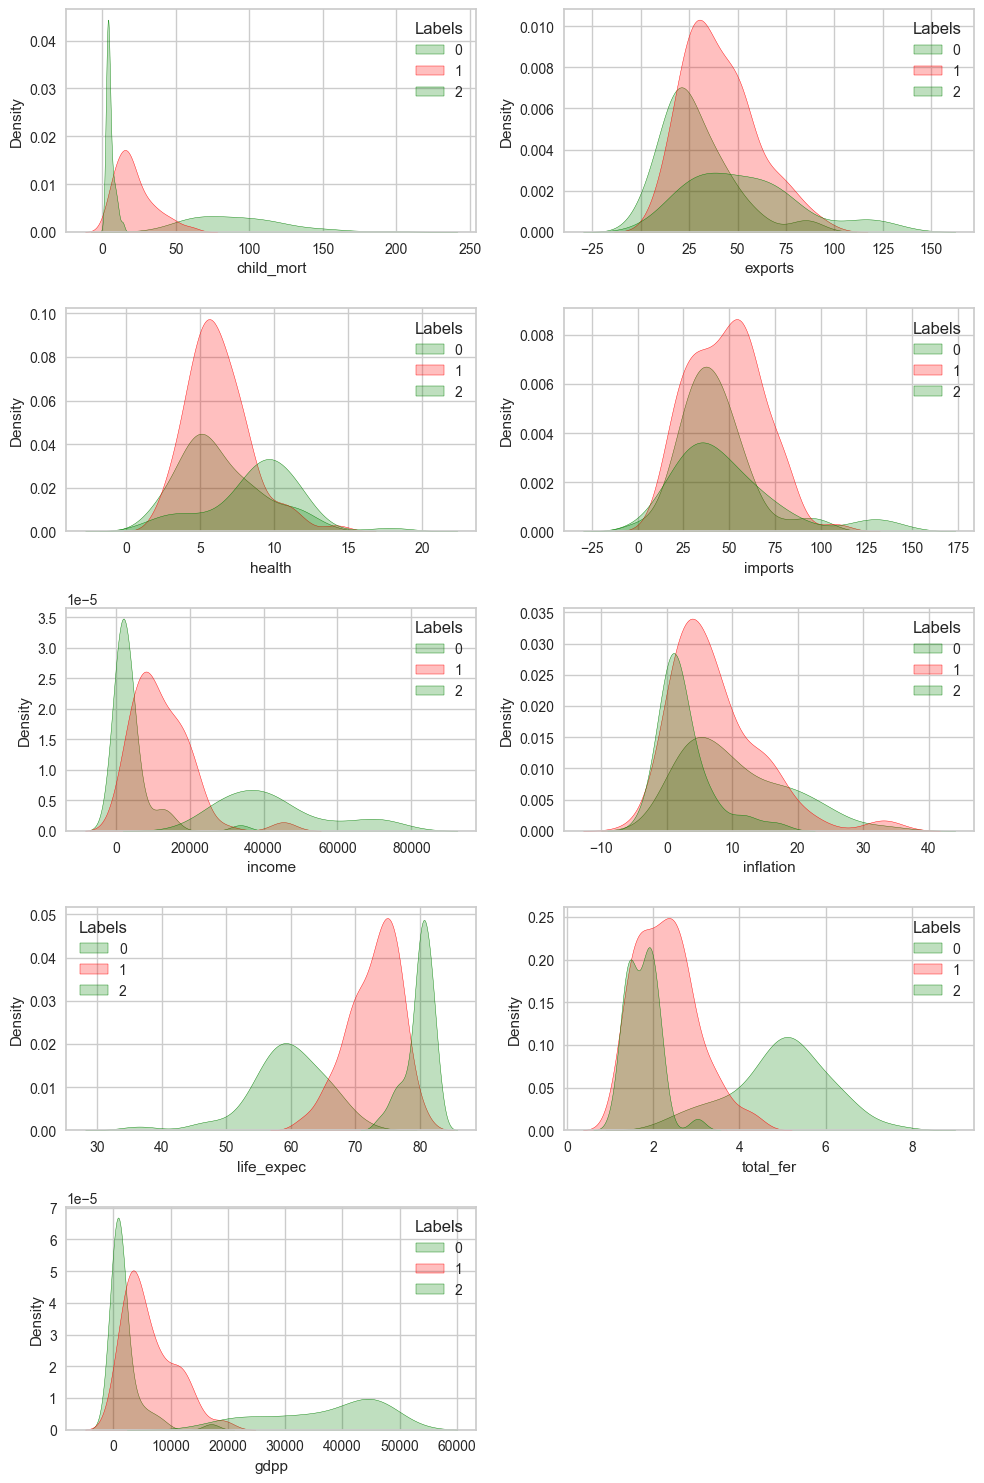

In [660]:
k=1
plt.figure(figsize=(10,15))
for i in data.columns:
      if i not in ["Labels", "Status"]:
        plt.subplot(5,2,k)
        sns.kdeplot(data=data,x=i,hue='Labels',palette=['green','red'],fill=True)
        k+=1
plt.tight_layout()
plt.show()

Inference

1)child mortality,inflation and total_fertility is significantly high in countries that require funds

2)GDP,Income and life expectancy is significantly low in countries require funds



# plot these countries on world map and see which countries from continents require more funds

In [661]:
import plotly.express as px

In [662]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels,Status
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,Under_developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,Under_developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,Developing


In [664]:
px.choropleth(data_frame=data,locationmode="country names",locations=data.index,
              color="Status",color_discrete_map={"Under_developed":"red","Developed":"green","Developing":"blue"})

Inference
Most of the countries from Asian and South American conntinents require the funds

# Deployment

We can make predictions using k-means clustering.It will assign a centroid to the new datapoint and will classify it

New data

In [666]:
d=[90.2,10,7.58,44.9,1610,6.44,56.2,5.82,1000]  #New data (to be predicted)


Scaling,Transforming and predicting

In [669]:
#Scaling
d_s=scaler.transform([d])

#Transforming
d_pc=pca_final.transform(d_s)

#Final prediction
print(kmean_final.predict(d_pc)[0])

2


Saving all the instances to pickle files

In [670]:
import pickle

In [675]:
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)
    

In [673]:
with open("pca.pkl","wb") as file:
    pickle.dump(pca_final,file)

In [674]:
with open("model.pkl","wb") as file:
    pickle.dump(kmean_final,file)